## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Question 1

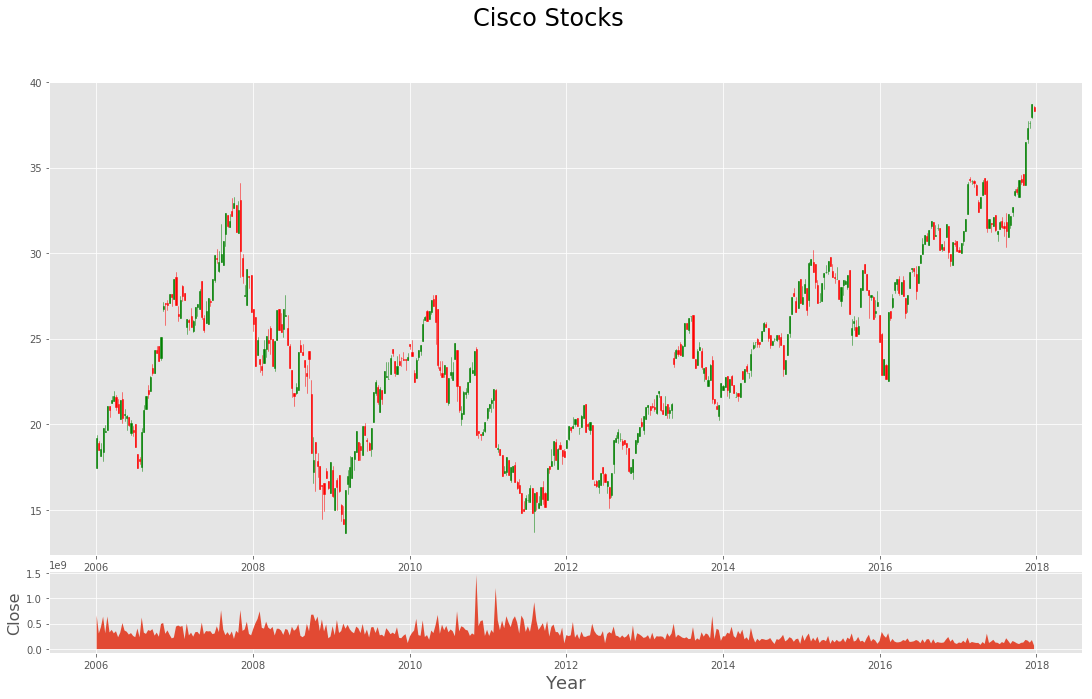

In [62]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
style.use('ggplot')

df = pd.read_csv('CSCO_2006-01-01_to_2018-01-01.csv', parse_dates=True, index_col=0)

df_ohlc = df['Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()
ax1.autoscale_view()

plt.suptitle('Cisco Stocks', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close', fontsize=16)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()


## Question 2

In [12]:
amazon_stocks = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')

In [13]:
amazon_stocks.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [14]:
ama = amazon_stocks.sort_values(by='Date')

In [16]:
ama.set_index('Date',inplace=True)

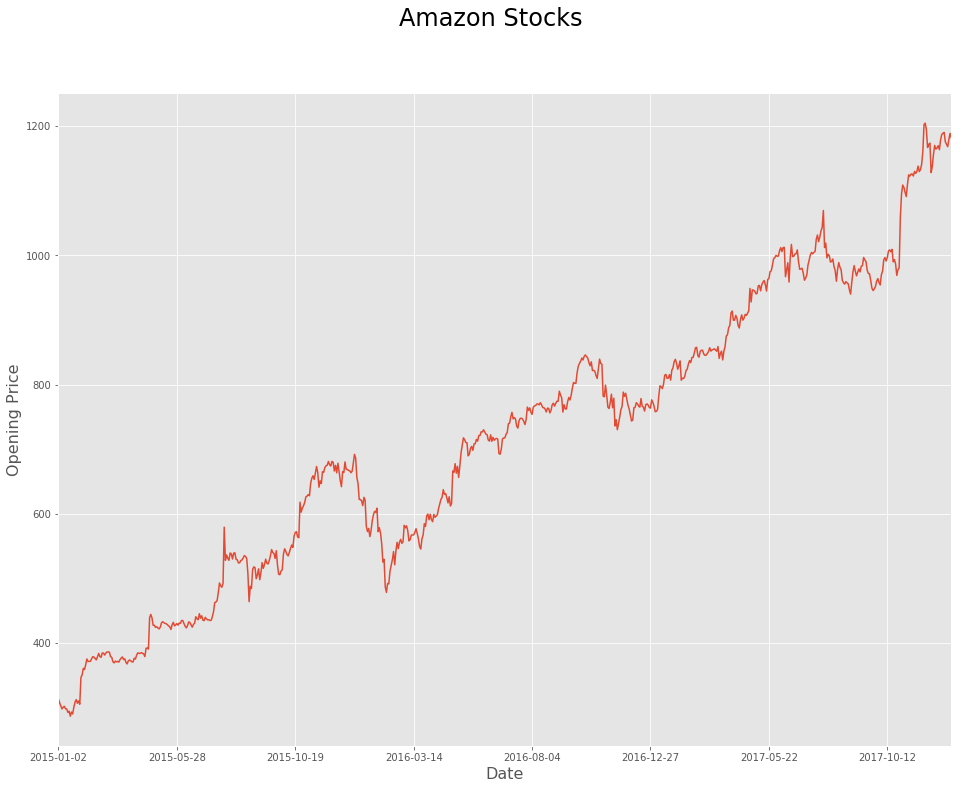

In [21]:
plt.suptitle('Amazon Stocks', fontsize=24)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Opening Price', fontsize=16)
ama.truncate(before='2015-01-01')['Open'].plot(figsize=(16, 12))

## Question 3

In [7]:
## Reading the file

In [40]:
apple = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')

In [8]:
## Diplay the file head

In [5]:
apple.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,10.34,10.68,10.32,10.68,201853036,AAPL
1,1/4/2006,10.73,10.85,10.64,10.71,155225609,AAPL
2,1/5/2006,10.69,10.70,10.54,10.63,112396081,AAPL
3,1/6/2006,10.75,10.96,10.65,10.90,176139334,AAPL
4,1/9/2006,10.96,11.03,10.82,10.86,168861224,AAPL


## Check for any missing values

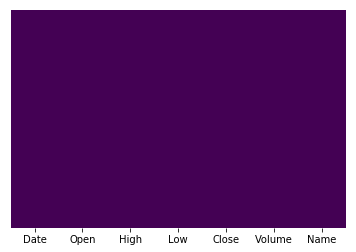

In [6]:
sns.heatmap(apple.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
X = apple[['Open','High','Low','Volume']]
y = apple['Close']

In [42]:
from sklearn.model_selection import train_test_split

# Training the dataset

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [44]:
from sklearn.linear_model import LinearRegression

# Linear Regression 

In [45]:
lm = LinearRegression()

In [48]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# print the intercept
print(lm.intercept_)

-0.0391970113393


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Open,-6.215313e-01
High,8.116321e-01
Low,8.104274e-01
Volume,2.380386e-10


From the intercept and coefficients we can formulate the equation to predict the Closing price of the stocks for apple as follows:



 Close = -0.0391970113393 + -6.215313e-01 * Open + 8.116321e-01 * High + 8.104274e-01 * Low + 2.380386e-10 * Volume
 

In [49]:
predictions = lm.predict(X_test)

# Plotting the predicted values against the actual values to check the accuracy of the model

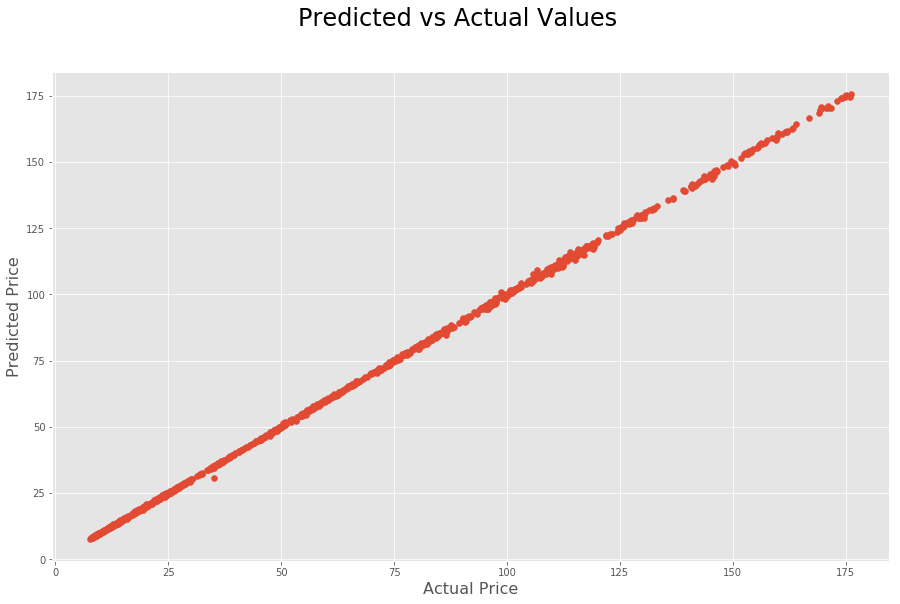

In [51]:
plt.suptitle('Predicted vs Actual Values', fontsize=24)
plt.xlabel('Actual Price', fontsize=16)
plt.ylabel('Predicted Price', fontsize=16)
plt.scatter(y_test,predictions)

In [18]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.271157549066
MSE: 0.189142984067
RMSE: 0.434905718596


## Question 4

#Reading the file

In [96]:
all_stocks = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv', parse_dates=True, index_col=0)

In [31]:
all_stocks.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [97]:
stocks_volume = all_stocks[['Name','Volume']]

In [98]:
stocks_volume = stocks_volume.groupby('Name')

In [99]:
stocks_totals = stocks_volume.sum()

In [100]:
stocks_totals =stocks_totals.sort_values(by = 'Volume', ascending = True) 

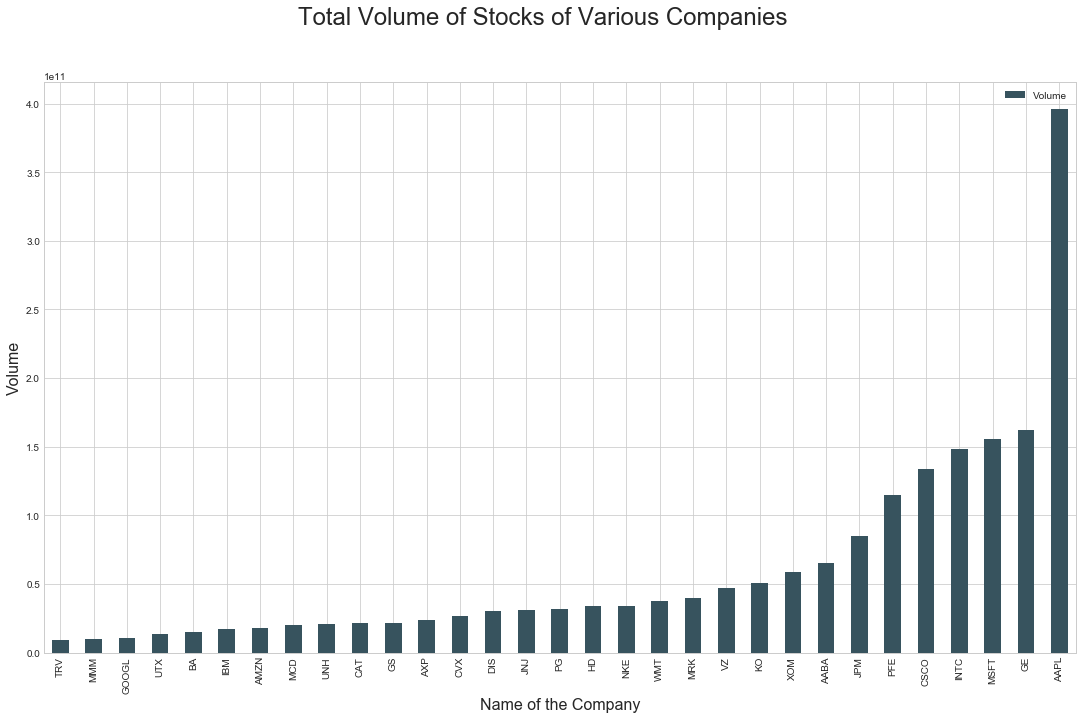

In [102]:
my_plot = stocks_totals.plot(kind='bar')
plt.suptitle('Total Volume of Stocks of Various Companies', fontsize=24)
plt.xlabel('Name of the Company', fontsize=16)
plt.ylabel('Volume', fontsize=16)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


## Question 5

In [2]:
stocks_all = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv', parse_dates=True)

In [3]:
stocks_all.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,77.76,79.35,77.24,79.11,3117200,MMM
1,1/4/2006,79.49,79.49,78.25,78.71,2558000,MMM
2,1/5/2006,78.41,78.65,77.56,77.99,2529500,MMM
3,1/6/2006,78.64,78.90,77.64,78.63,2479500,MMM
4,1/9/2006,78.50,79.83,78.46,79.02,1845600,MMM


In [4]:
stocks_all['Date']=pd.to_datetime(stocks_all['Date'])
stocks_all['Year']=stocks_all['Date'].dt.year

In [6]:
stocks_all.head()

,Date,Open,High,Low,Close,Volume,Name,Year
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006


In [7]:
df4=stocks_all[stocks_all['Year']==2017]

In [8]:
df4.head()

,Date,Open,High,Low,Close,Volume,Name,Year
2769,2017-01-03,178.83,180.00,177.22,178.05,2510055,MMM,2017
2770,2017-01-04,178.03,178.90,177.61,178.32,1541985,MMM,2017
2771,2017-01-05,178.26,179.14,176.89,177.71,1447848,MMM,2017
2772,2017-01-06,177.29,178.60,175.80,178.23,1625049,MMM,2017
2773,2017-01-09,178.37,178.38,177.20,177.27,1622625,MMM,2017


In [27]:
volume = df4[['Name','Volume']]

In [28]:
volume=volume.groupby('Name').sum()

In [29]:
volume =volume.sort_values(by = 'Volume', ascending = False) 

In [30]:
volume.head()

,Volume
Name,
GE,11505807179
AAPL,6811235883
INTC,6000293229
MSFT,5631724824
CSCO,5073906830


In [48]:
volume=volume.reset_index()

In [50]:
print(volume.columns)

Index(['Name', 'Volume'], dtype='object')


## Tree Plot

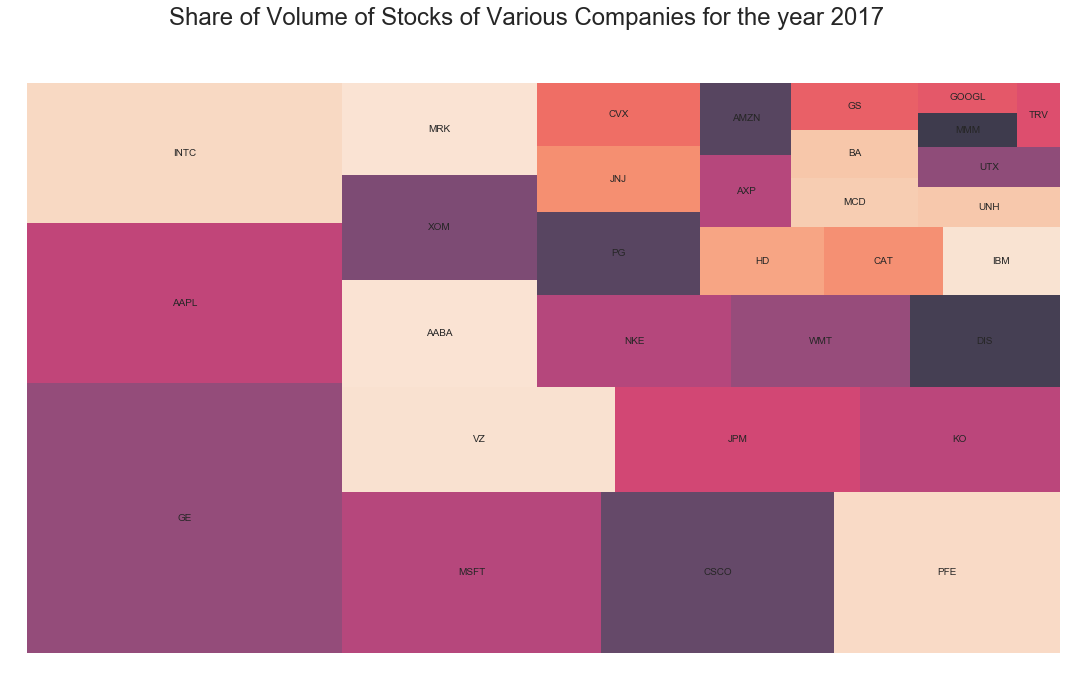

In [91]:
squarify.plot(sizes=volume['Volume'],label=volume['Name'], alpha=.8 )
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.suptitle('Share of Volume of Stocks of Various Companies for the year 2017', fontsize=24)
plt.axis('off')
plt.show()


## Question 6

In [65]:
google=pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv',parse_dates=True)

In [67]:
google['Date']=pd.to_datetime(google['Date'])
google['Year']=google['Date'].dt.year

In [68]:
google.head()

,Date,Open,High,Low,Close,Volume,Name,Year
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,2006
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,2006
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2006
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,2006
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,2006


In [70]:
google_stocks=google[['Open','High','Low','Close','Volume','Year']]

In [71]:
google_1=google_stocks.groupby('Year').mean()

In [73]:
google_1=google_1.reset_index()

In [74]:
google_1.head()

,Year,Open,High,Low,Close,Volume
0,2006,206.154183,208.469482,203.364462,205.798048,8.502528e+06
1,2007,269.683426,272.360040,266.764303,269.644462,5.447597e+06
2,2008,233.372134,237.407708,228.564269,232.658775,6.348455e+06
3,2009,219.705516,222.215516,217.452222,220.064127,3.512794e+06
4,2010,268.365538,270.679442,265.590199,268.013665,3.186180e+06


In [75]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

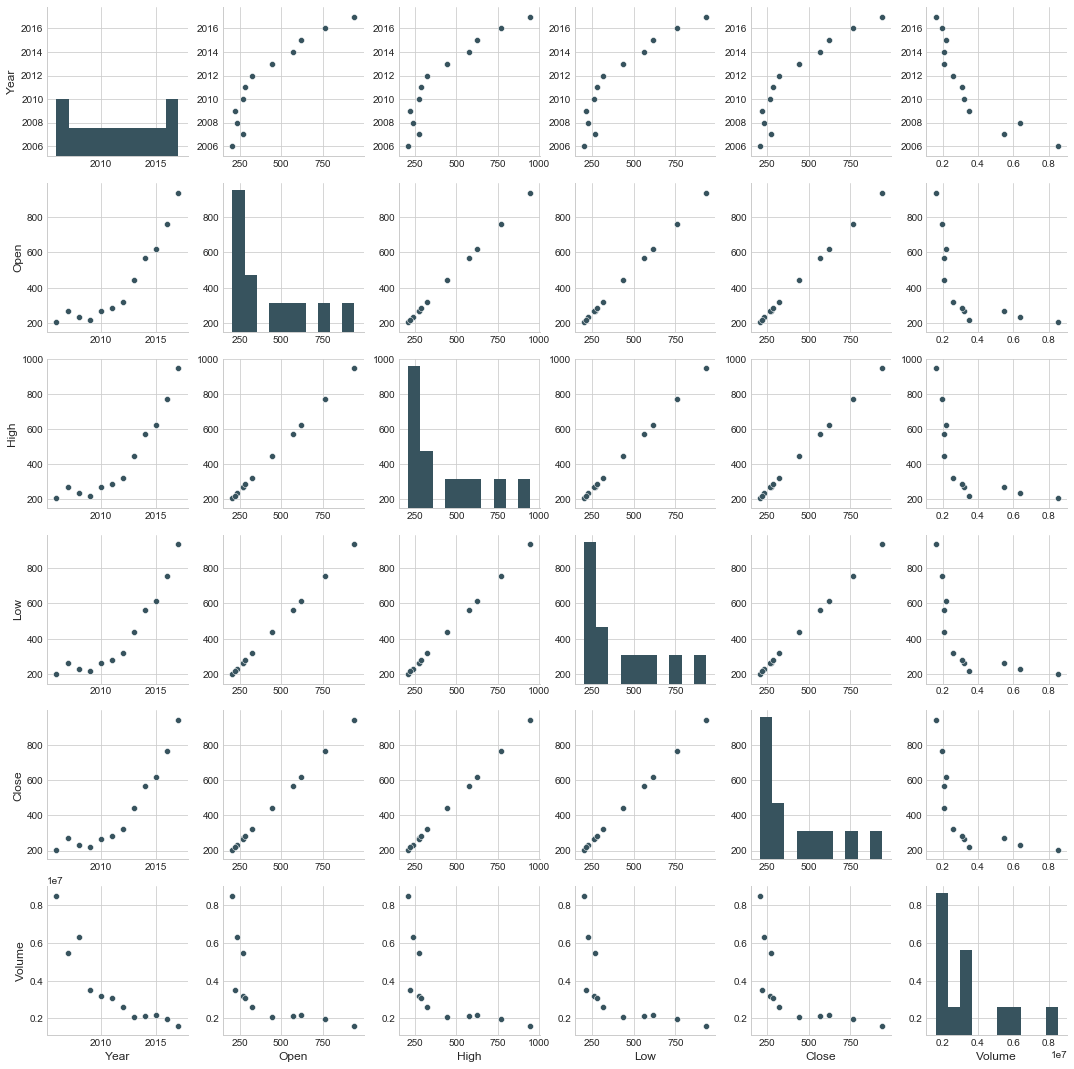

In [95]:
plt.suptitle('Pair Plot of Stocks of Google', fontsize=24)
google_pair=sns.pairplot(google_1)

## Question 7

In [77]:
nike=pd.read_csv('NKE_2006-01-01_to_2018-01-01.csv',parse_dates=True)

In [78]:
nike['Date']=pd.to_datetime(nike['Date'])
nike['Year']=nike['Date'].dt.year
nike['Month']=nike['Date'].dt.month


In [79]:
nike.head()

,Date,Open,High,Low,Close,Volume,Name,Year,Month
0,2006-01-03,10.85,10.92,10.67,10.74,18468800,NKE,2006,1
1,2006-01-04,10.71,10.80,10.67,10.69,15832000,NKE,2006,1
2,2006-01-05,10.69,10.83,10.69,10.76,9256000,NKE,2006,1
3,2006-01-06,10.79,10.83,10.71,10.72,7573600,NKE,2006,1
4,2006-01-09,10.72,10.98,10.72,10.88,10441600,NKE,2006,1


In [82]:
nike_2010=nike[nike['Year']==2010]

In [83]:
nike_2010.head()

,Date,Open,High,Low,Close,Volume,Name,Year,Month
1007,2010-01-04,16.52,16.52,16.28,16.34,11972588,NKE,2010,1
1008,2010-01-05,16.28,16.45,16.18,16.40,6275456,NKE,2010,1
1009,2010-01-06,16.35,16.42,16.24,16.30,13399228,NKE,2010,1
1010,2010-01-07,16.28,16.50,16.26,16.46,7187644,NKE,2010,1
1011,2010-01-08,16.45,16.46,16.24,16.43,7249636,NKE,2010,1


In [88]:
nike_2=nike_2010[['Month','Volume']]

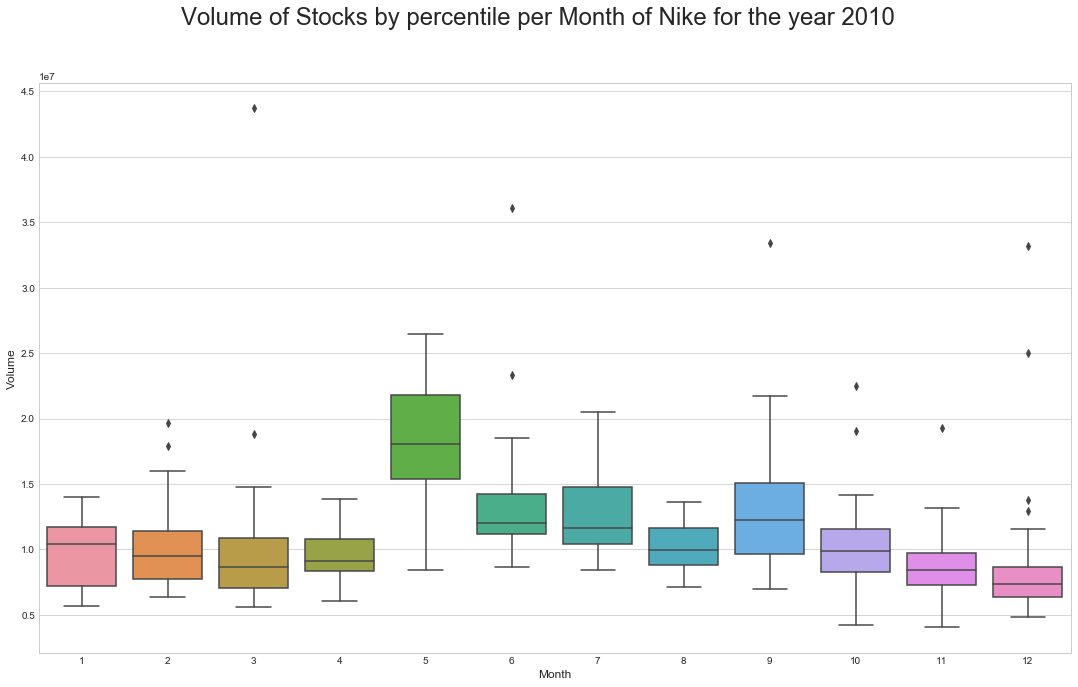

In [94]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.suptitle('Volume of Stocks by percentile per Month of Nike for the year 2010', fontsize=24)
nike_plot=sns.boxplot(x='Month',y='Volume',data=nike_2)

## Question 8

In [ ]:
# bubble chart
# area Plot
# (close-open)/(high-low)

In [103]:
apple_8=pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')

In [108]:
# Plotting several moving averages for apple stock
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    apple_8[column_name] = pd.rolling_mean(apple_8['Close'],ma)

C:\Users\navne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\Users\navne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\navne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  
C:\Users\navne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  


## Moving Averages for the Apple stock Market

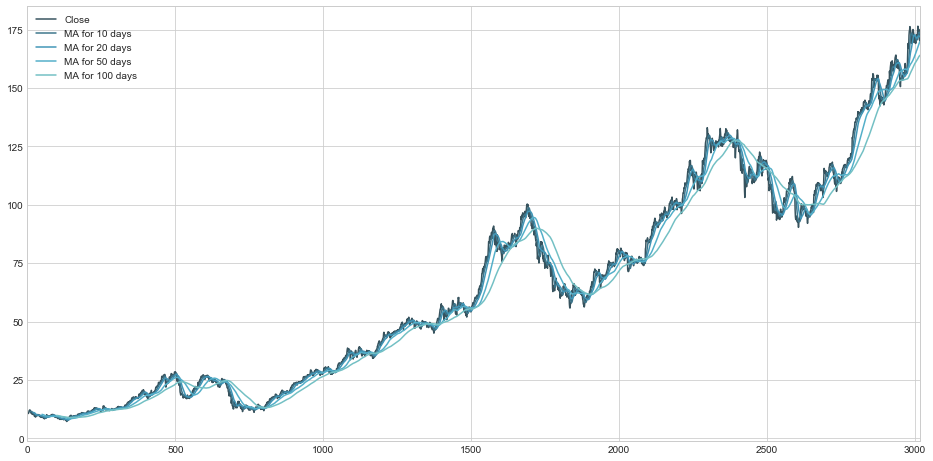

In [116]:
#plt.suptitle(' Moving Averages for Apple stock', fontsize=24)
#plt.xlabel('Moving Average Prices', fontsize=16)
#plt.ylabel('Day Number starting from 1st Jan 2006', fontsize=16)
ma_apple=apple_8[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(16,8))

## Question 9

## Plotting the daily return percentage

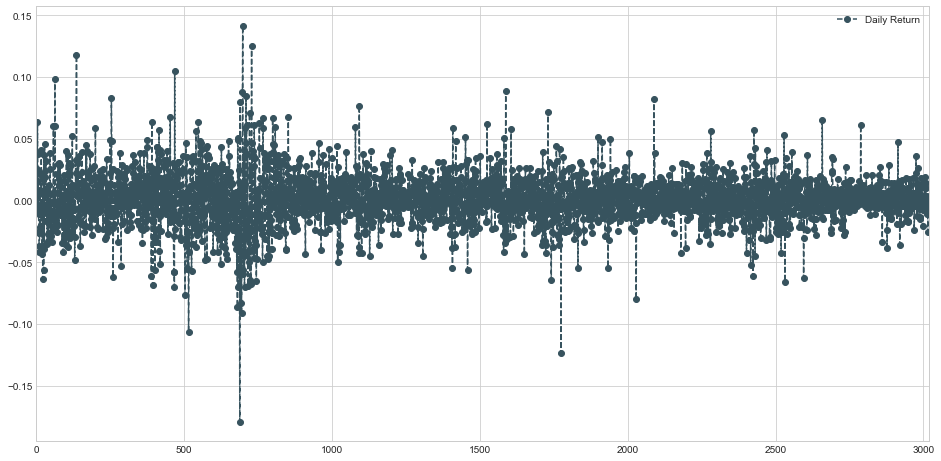

In [115]:
# Using pct_change to find the percent change for each day
apple_8['Daily Return'] = apple_8['Close'].pct_change()

# Plotting the daily return percentage
apple_8['Daily Return'].plot(figsize=(16,8), legend=True, linestyle='--', marker='o')



## Question 10

In [123]:
a_stocks=pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv')

In [131]:
a1_stocks=a_stocks.groupby('Name')

In [132]:
tech_returns = a1_stocks.pct_change()

## Heat Map

## Correlation between opening,closing.low, high prices of stocks w.r.t Volume

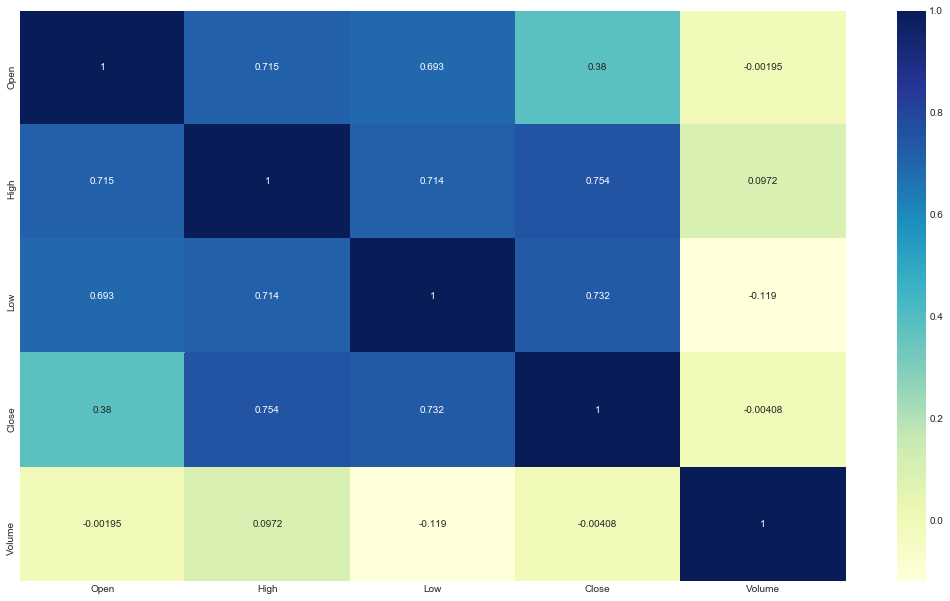

In [134]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')